**Working with Multi-Class Classification**
* Dataset: Tensorflow fashion mnist dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [4]:
# Visualizing an item
def plot_data(index_choice):
    plt.imshow(train_data[index_choice], cmap=plt.cm.binary)
    plt.title(class_names[train_label[index_choice]])
    plt.show()

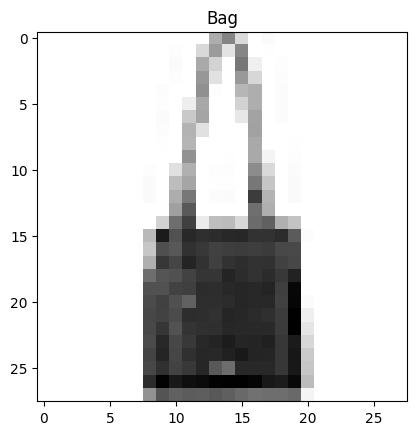

In [5]:
plot_data(200)

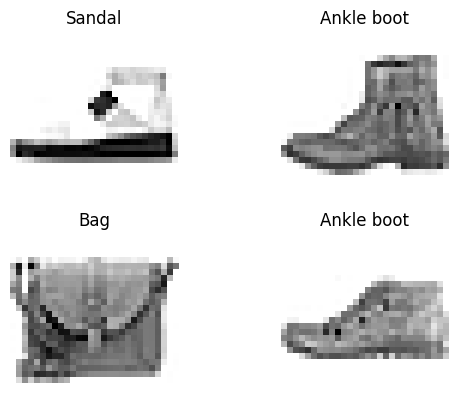

In [6]:
# Visualizing multiple item
import random
plt.Figure=(8,8)
for i in range(4):
    ax =plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.title(class_names[train_label[rand_index]])
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)

In [7]:
train_data[0].shape

(28, 28)

Building a basic model multi-label classification

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.fit(
    train_data,
    train_label,
    epochs=10,
    validation_data = (test_data,test_label)
)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1209 - loss: 4.0492 - val_accuracy: 0.2174 - val_loss: 2.0849
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2138 - loss: 1.9953 - val_accuracy: 0.3013 - val_loss: 1.7012
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3006 - loss: 1.6828 - val_accuracy: 0.3022 - val_loss: 1.6376
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3274 - loss: 1.6109 - val_accuracy: 0.3457 - val_loss: 1.5927
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3451 - loss: 1.5651 - val_accuracy: 0.3542 - val_loss: 1.5413
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3479 - loss: 1.5390 - val_accuracy: 0.3413 - val_loss: 1.5661
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3579 - loss: 1.5160 - val_accuracy: 0.3539 - val_loss: 1.5299
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3790 - loss: 1.4869 - 

**Doing feature scaling to see to how it will affect the accuracy**
* scaling
* normalization

In [9]:
train_data.min(), train_data.max()

(0, 255)

In [10]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [11]:
train_data_norm.min(),  train_data_norm.max()

(0.0, 1.0)

In [ ]:
# new model defination
model_norm = tf.keras.Sequential()
model_norm.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_norm.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm.add(tf.keras.layers.Dense(10, activation='softmax'))

# model compilation
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
